In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longtitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [ ]:
# Can set size to a smaller set of data to test, 

In [3]:
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)

# Print the city count to confirm suficient count. 
len(cities)

617

In [25]:
list(cities)

['arraial do cabo',
 'puerto ayora',
 'butaritari',
 'punta arenas',
 'yellowknife',
 'mar del plata',
 'auki',
 'saint-philippe',
 'paita',
 'henties bay',
 'salalah',
 'hilo',
 'monster',
 'harper',
 'port alfred',
 'yarmouth',
 'mahebourg',
 'atuona',
 'pachino',
 'houlton',
 'buraydah',
 'abja-paluoja',
 'haines junction',
 'sloboda',
 'aitape',
 'victoria',
 'bluff',
 'lazurne',
 'saskylakh',
 'busselton',
 'new norfolk',
 'pavlodar',
 'khandyga',
 'cockburn town',
 'albany',
 'severodvinsk',
 'severo-kurilsk',
 'berlevag',
 'limon',
 'port-gentil',
 'roald',
 'jalpan',
 'jumla',
 'bambous virieux',
 'qaanaaq',
 'ushuaia',
 'kapaa',
 'tabulbah',
 'tuktoyaktuk',
 'rocha',
 'mataura',
 'taloqan',
 'borovskoy',
 'barentsburg',
 'poum',
 'uribia',
 'thompson',
 'palmer',
 'ambilobe',
 'faanui',
 'bredasdorp',
 'grajewo',
 'carballo',
 'hithadhoo',
 'tongliao',
 'saint george',
 'san patricio',
 'upernavik',
 'hermanus',
 'nouadhibou',
 'vaini',
 'pangnirtung',
 'ancud',
 'dhidhdhoo',


In [26]:
for i, city in enumerate(cities):
    print(i)
    print(city)

0
arraial do cabo
1
puerto ayora
2
butaritari
3
punta arenas
4
yellowknife
5
mar del plata
6
auki
7
saint-philippe
8
paita
9
henties bay
10
salalah
11
hilo
12
monster
13
harper
14
port alfred
15
yarmouth
16
mahebourg
17
atuona
18
pachino
19
houlton
20
buraydah
21
abja-paluoja
22
haines junction
23
sloboda
24
aitape
25
victoria
26
bluff
27
lazurne
28
saskylakh
29
busselton
30
new norfolk
31
pavlodar
32
khandyga
33
cockburn town
34
albany
35
severodvinsk
36
severo-kurilsk
37
berlevag
38
limon
39
port-gentil
40
roald
41
jalpan
42
jumla
43
bambous virieux
44
qaanaaq
45
ushuaia
46
kapaa
47
tabulbah
48
tuktoyaktuk
49
rocha
50
mataura
51
taloqan
52
borovskoy
53
barentsburg
54
poum
55
uribia
56
thompson
57
palmer
58
ambilobe
59
faanui
60
bredasdorp
61
grajewo
62
carballo
63
hithadhoo
64
tongliao
65
saint george
66
san patricio
67
upernavik
68
hermanus
69
nouadhibou
70
vaini
71
pangnirtung
72
ancud
73
dhidhdhoo
74
khatanga
75
jamestown
76
paveh
77
chuy
78
inverness
79
trairi
80
mount gambier
81

In [6]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime 

In [7]:
# Import the requests library 
import requests
requests.__version__

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [27]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | auki
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | paita
Processing Record 10 of Set 1 | henties bay
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | monster
Processing Record 14 of Set 1 | harper
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | yarmouth
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | pachino
Processing Record 20 of Set 1 | houlton
Processing Record 21 of Set 1 | buraydah
Processing Record 22 of Set 1 | abja-paluoja
Processing Record 23 of Se

Processing Record 40 of Set 4 | chicama
Processing Record 41 of Set 4 | pampas
Processing Record 42 of Set 4 | cherskiy
Processing Record 43 of Set 4 | coihaique
Processing Record 44 of Set 4 | barrow
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 47 of Set 4 | chagda
City not found. Skipping...
Processing Record 48 of Set 4 | canto do buriti
Processing Record 49 of Set 4 | hudson bay
Processing Record 50 of Set 4 | banes
Processing Record 1 of Set 5 | la ronge
Processing Record 2 of Set 5 | sembakung
Processing Record 3 of Set 5 | calama
Processing Record 4 of Set 5 | gavle
Processing Record 5 of Set 5 | airai
Processing Record 6 of Set 5 | anadyr
Processing Record 7 of Set 5 | kamenka
Processing Record 8 of Set 5 | kumhari
Processing Record 9 of Set 5 | hasaki
Processing Record 10 of Set 5 | dapaong
Processing Record 11 of Set 5 | comodoro rivadavia
Processing Record 12 of Set 5 | saldanha
Processing R

Processing Record 29 of Set 8 | storforshei
Processing Record 30 of Set 8 | santa cruz del sur
Processing Record 31 of Set 8 | okhotsk
Processing Record 32 of Set 8 | fort nelson
Processing Record 33 of Set 8 | nenjiang
Processing Record 34 of Set 8 | dalvik
Processing Record 35 of Set 8 | atambua
Processing Record 36 of Set 8 | kabelvag
Processing Record 37 of Set 8 | iqaluit
Processing Record 38 of Set 8 | zhigansk
Processing Record 39 of Set 8 | shelburne
Processing Record 40 of Set 8 | karaton
Processing Record 41 of Set 8 | srednekolymsk
Processing Record 42 of Set 8 | kuusamo
Processing Record 43 of Set 8 | portage
Processing Record 44 of Set 8 | rio grande
Processing Record 45 of Set 8 | kupang
Processing Record 46 of Set 8 | mumford
Processing Record 47 of Set 8 | katherine
Processing Record 48 of Set 8 | horizontina
Processing Record 49 of Set 8 | carauari
Processing Record 50 of Set 8 | newnan
Processing Record 1 of Set 9 | pevek
Processing Record 2 of Set 9 | cidreira
Proces

Processing Record 14 of Set 12 | salaga
Processing Record 15 of Set 12 | walvis bay
Processing Record 16 of Set 12 | zhuhai
Processing Record 17 of Set 12 | zatoka
Processing Record 18 of Set 12 | vardo
Processing Record 19 of Set 12 | bud
Processing Record 20 of Set 12 | malaya serdoba
Processing Record 21 of Set 12 | yarada
Processing Record 22 of Set 12 | coquimbo
Processing Record 23 of Set 12 | atlantic beach
Processing Record 24 of Set 12 | abu kamal
Processing Record 25 of Set 12 | mandan
Processing Record 26 of Set 12 | dir
Processing Record 27 of Set 12 | benghazi
Processing Record 28 of Set 12 | berekum
Processing Record 29 of Set 12 | moose factory
Processing Record 30 of Set 12 | saint anthony
Processing Record 31 of Set 12 | cururupu
Processing Record 32 of Set 12 | manzhouli
Processing Record 33 of Set 12 | sorland
Processing Record 34 of Set 12 | oak ridge
Processing Record 35 of Set 12 | coahuayana
Processing Record 36 of Set 12 | rawson
Processing Record 37 of Set 12 |

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,71.46,88,75,9.22,BR,2022-07-20 21:07:14
1,Puerto Ayora,-0.7393,-90.3518,68.56,99,92,8.01,EC,2022-07-20 21:02:42
2,Butaritari,3.0707,172.7902,81.43,78,61,8.86,KI,2022-07-20 21:05:19
3,Punta Arenas,-53.1500,-70.9167,33.91,80,75,24.16,CL,2022-07-20 21:02:31
4,Yellowknife,62.4560,-114.3525,67.10,39,89,10.51,CA,2022-07-20 21:07:19
5,Mar Del Plata,-38.0023,-57.5575,61.88,60,20,11.01,AR,2022-07-20 21:07:05
6,Auki,-8.7676,160.7034,79.03,81,100,2.77,SB,2022-07-20 21:07:20
7,Saint-Philippe,-21.3585,55.7679,69.39,80,44,13.82,RE,2022-07-20 21:07:20
8,Paita,-5.0892,-81.1144,67.60,72,26,17.18,PE,2022-07-20 21:02:46
9,Henties Bay,-22.1160,14.2845,55.29,85,0,6.78,NA,2022-07-20 21:07:21


In [32]:
# Re-order column 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2022-07-20 21:07:14,-22.9661,-42.0278,71.46,88,75,9.22
1,Puerto Ayora,EC,2022-07-20 21:02:42,-0.7393,-90.3518,68.56,99,92,8.01
2,Butaritari,KI,2022-07-20 21:05:19,3.0707,172.7902,81.43,78,61,8.86
3,Punta Arenas,CL,2022-07-20 21:02:31,-53.1500,-70.9167,33.91,80,75,24.16
4,Yellowknife,CA,2022-07-20 21:07:19,62.4560,-114.3525,67.10,39,89,10.51
...,...,...,...,...,...,...,...,...,...
564,Viedma,AR,2022-07-20 21:23:22,-40.8135,-62.9967,63.99,42,82,24.81
565,Odoyev,RU,2022-07-20 21:23:23,53.9393,36.6864,53.38,95,69,10.16
566,Sakhipur,BD,2022-07-20 21:23:23,24.3000,90.1833,78.55,94,100,6.87
567,Zaysan,KZ,2022-07-20 21:23:23,47.4667,84.8667,63.84,38,72,8.70


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

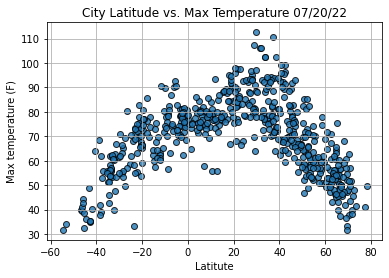

In [37]:
# Import time module
import time 

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max temperature (F)")
plt.xlabel("Latitute")
plt.grid(True)
          
# Save the figure.
plt.savefig("weather_data/Fig1.png")
          
# Show plot.
plt.show()

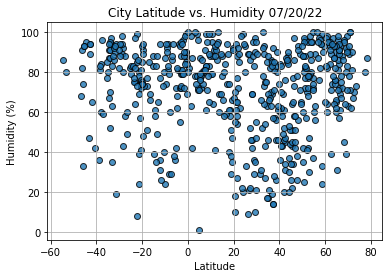

In [38]:
# Build the scatter plots for latitude vs humidity.
plt.scatter(lats, 
           humidity, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt. ylabel("Humidity (%)")
plt. xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

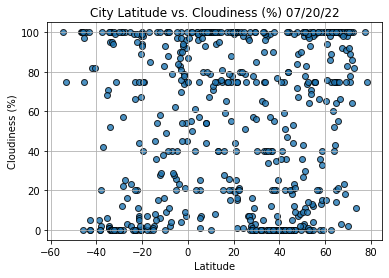

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

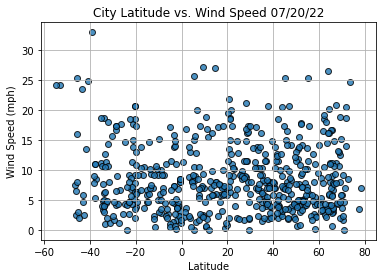

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()